In [1]:
import pandas as pd
import numpy as np

## DATA CLEANING

### Cab Data


In [2]:
CabData=pd.read_csv('/home/miano/Documents/DataGlacier/week2/DataSets/Cab_Data.csv')
CabData.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [3]:
CabData.shape

(359392, 7)

In [4]:
CabData.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [5]:
CabData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
Transaction ID    359392 non-null int64
Date of Travel    359392 non-null int64
Company           359392 non-null object
City              359392 non-null object
KM Travelled      359392 non-null float64
Price Charged     359392 non-null float64
Cost of Trip      359392 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [6]:
CabData.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

There are no missing values in the dataset. The dataset has 7 columns and 359392 rows. However, the dataset has some changes to be made:

1. Data type:

    a) Transaction ID is not supposed to be an integer, should be float type
    
    b) Date of Travel is supposed to be a date, not integer values

In [7]:
#Convert transactions ID to float type
CabData['Transaction ID']=CabData['Transaction ID'].astype(object)
CabData['Transaction ID'].dtype

dtype('O')

In [8]:
#Check for any duplicated values
CabData['Transaction ID'].duplicated().sum()

#There are no duplicated transactions

0

#### Categorical Data

In [9]:
CabData['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [10]:
CabData['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [11]:
CabData['City'].value_counts().count()

19

There are 2 companies: Yellow cab and pink cab. 
The two companies operate in 19 cities

#### Numerical Data

### City Data

In [12]:
#Load dataset
city=pd.read_csv('/home/miano/Documents/DataGlacier/week2/DataSets/City.csv')
city.head(20)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [13]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

In [14]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
City          20 non-null object
Population    20 non-null object
Users         20 non-null object
dtypes: object(3)
memory usage: 560.0+ bytes


There are 20 cities, each given its population and users. There are no null values. However, columns population and users are of object data type instead of integer.

In [140]:
#Convert population and users to the correct data type
city['Population']=city['Population'].str.replace(',','')
city['Population'].astype(int)

city['Users']=city['Users'].str.replace(',','')
city['Users'].astype(int)


0     302149
1     164468
2     144132
3      17675
4      27247
5      12994
6      69995
7       6133
8      22157
9      24701
10     12421
11     14978
12     25063
13      5712
14    213609
15      7044
16      3643
17    127001
18      9270
19     80021
Name: Users, dtype: int64

In [141]:

city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
City          20 non-null object
Population    20 non-null object
Users         20 non-null object
dtypes: object(3)
memory usage: 560.0+ bytes


### Customer Data

In [16]:
customer=pd.read_csv(r'/home/miano/Documents/DataGlacier/week2/DataSets/Customer_ID.csv')
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [17]:
customer.shape

(49171, 4)

In [18]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
Customer ID           49171 non-null int64
Gender                49171 non-null object
Age                   49171 non-null int64
Income (USD/Month)    49171 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [19]:
customer['Gender'].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

In [20]:
# Convert Customer ID into object data type
customer['Customer ID']=customer['Customer ID'].astype(object)

In [21]:
customer.describe()

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


### Transactions Data

In [22]:
transactions=pd.read_csv(r'/home/miano/Documents/DataGlacier/week2/DataSets/Transaction_ID.csv')
transactions.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [23]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
Transaction ID    440098 non-null int64
Customer ID       440098 non-null int64
Payment_Mode      440098 non-null object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [24]:
# Convert transactions ID and Customer ID into object type
transactions['Customer ID']=transactions['Customer ID'].astype(object)
transactions['Transaction ID']=transactions['Transaction ID'].astype(object)
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
Transaction ID    440098 non-null object
Customer ID       440098 non-null object
Payment_Mode      440098 non-null object
dtypes: object(3)
memory usage: 10.1+ MB


In [25]:
transactions['Payment_Mode'].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [26]:
transactions.shape

(440098, 3)

Transactions Dataset is fairly cleaned, no missing values. 440098 entries of different transaction IDs, payment modes and customers ID. Only required conversion of Transaction ID and Customer ID into object data types, not integers.

In [27]:
#Check for any duplicated values
transactions['Transaction ID'].duplicated().sum()

0

In [28]:
transactions['Customer ID'].duplicated().sum()

390927

In [29]:
transactions['Customer ID'].value_counts()

494      54
2939     53
2766     51
1070     51
1803     50
2539     50
944      50
903      50
1067     50
1628     50
858      50
126      50
2577     49
1103     49
2895     49
442      49
1360     49
1673     48
2776     48
1452     48
2912     48
336      48
205      48
1532     47
972      47
960      47
696      47
1769     47
1546     47
42879    47
         ..
10243     1
29907     1
10240     1
29909     1
29867     1
10283     1
29866     1
10285     1
10323     1
29801     1
10321     1
29807     1
29808     1
29809     1
10314     1
29816     1
29819     1
29830     1
10303     1
29842     1
29847     1
10300     1
10297     1
29852     1
29855     1
10291     1
10288     1
10287     1
29865     1
47442     1
Name: Customer ID, Length: 49171, dtype: int64

Transaction IDs are not duplicated, hence accurate. But customer IDs are duplicated as one customer can have several transactions

From the three datasets, we can find relations between datasets

a) Link transactions dataset with cab dataset using the transaction ID column

b) Link transactions dataset with customer dataset using the customer ID column

c) Link the cab dataset with city dataset using the city column

Hence, all datasets can be linked to form one large dataset, making data analysis easier.

In [30]:
#Link b) 
customerTransactions=pd.merge(transactions,customer)
customerTransactions.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [31]:
#Link a) and b)
data=pd.merge(customerTransactions,CabData)
data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192


In [32]:
#Link c)
#Merge city data with main dataset



data=pd.merge(data,city,on='City')
data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701


Now we have one large dataset named "Data" which has combined all info from other datasets. This dataset will be used going forward. But first, we have to convert the date column into an appropriate data type. This is impossible hence we can drop this column.

In [61]:
data['Date of Travel']=data['Date of Travel'].astype(object)
#*****
#data['Date of Travel']=pd.to_datetime(data['Date of Travel'],format='%Y%m%d')

# EXPLORATORY DATA ANALYSIS

In [62]:
#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701


## Univariate Data Analysis: Categorical Variables

### 1. Gender

Frequency Distribution: 
 Male      205912
Female    153480
Name: Gender, dtype: int64
Percentage Distribution
 Male      0.572945
Female    0.427055
Name: Gender, dtype: float64


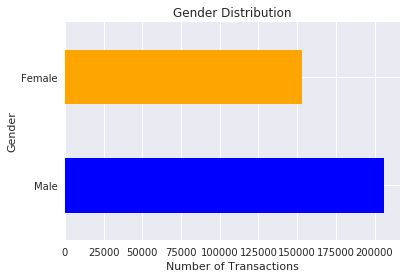

In [63]:
# Frequency Distribution
print('Frequency Distribution: ' "\n",data['Gender'].value_counts())

#Percentage Distribution
print('Percentage Distribution' "\n", data['Gender'].value_counts(normalize=True))

# Graph
sns.set()
data['Gender'].value_counts().plot.barh(color=['blue','orange'])
plt.xlabel('Number of Transactions')
plt.ylabel('Gender')
plt.title('Gender Distribution')
plt.show()

Frequency Distribution: 
 Male      26562
Female    22609
Name: Gender, dtype: int64
Percentage Distribution
 Male      0.540196
Female    0.459804
Name: Gender, dtype: float64


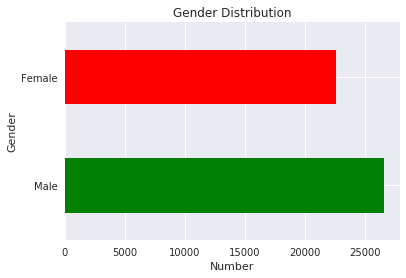

In [36]:
# Frequency Distribution
print('Frequency Distribution: ' "\n",customer['Gender'].value_counts())

#Percentage Distribution
print('Percentage Distribution' "\n", customer['Gender'].value_counts(normalize=True))

# Graph
sns.set()
customer['Gender'].value_counts().plot.barh(color=['green','red'])
plt.xlabel('Number')
plt.ylabel('Gender')
plt.title('Gender Distribution')
plt.show()

According to the customer database, there are more males (54%) than females (46%). In the same trend, males make more transactions compared to females, but at a higher rate. 

### 2. Company

Frequency Distribution: 
 Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64
Percentage Distribution
 Yellow Cab    0.764294
Pink Cab      0.235706
Name: Company, dtype: float64


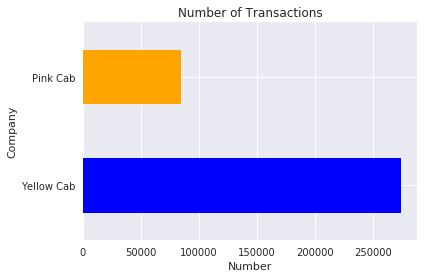

In [64]:
# Frequency Distribution
print('Frequency Distribution: ' "\n",data['Company'].value_counts())

#Percentage Distribution
print('Percentage Distribution' "\n", data['Company'].value_counts(normalize=True))

# Graph
sns.set()
data['Company'].value_counts().plot.barh(color=['blue','orange'])
plt.xlabel('Number')
plt.ylabel('Company')
plt.title('Number of Transactions')
plt.show()

Yellow Cab makes more transactions than the Pink Cab. We have to analyse the companies separately to see their differences

### 3. Payment Mode

### 4. City

## Univariate Data Analysis: Numerical Variables

## Bivariate Data Analysis

In [ ]:
#City Distribution per Company



### Analysing the companies separately

We have to split the data into two, for each of the companies: yellow cab and pink cab. Then we will do an analysis of their market and volume of business

In [65]:
# Split into pink cab and yellow cab
pink= data[data['Company']=='Pink Cab']
yellow=data[data['Company']=='Yellow Cab']

In [66]:
pink.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701
6,10395626,27703,Card,Male,27,9237,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.934,814885,24701
7,10000013,28712,Cash,Male,53,11242,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701
11,10000014,28020,Cash,Male,23,23327,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701


In [67]:
yellow.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701
5,10324737,27703,Cash,Male,27,9237,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,814885,24701
8,10079404,28712,Card,Male,53,11242,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,814885,24701


In [56]:
# Drop the Company column in pink and yellow dataset as it is no longer significant


## Company A: Pink Cab

In [68]:
pink.describe()

,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip
count,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000
mean,35.322414,15059.047137,22.559917,310.800856,248.148682
std,12.644780,7991.077762,12.231092,181.995661,135.403345
min,18.000000,2000.000000,1.900000,15.600000,19.000000
25%,25.000000,8371.000000,12.000000,159.970000,131.868000
50%,33.000000,14713.000000,22.440000,298.060000,246.330000
75%,42.000000,21055.000000,32.960000,441.505000,360.180000
max,65.000000,35000.000000,48.000000,1623.480000,576.000000


In [69]:
pink.shape

(84711, 14)

In [70]:
pink.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84711 entries, 0 to 359363
Data columns (total 14 columns):
Transaction ID        84711 non-null object
Customer ID           84711 non-null object
Payment_Mode          84711 non-null object
Gender                84711 non-null object
Age                   84711 non-null int64
Income (USD/Month)    84711 non-null int64
Date of Travel        84711 non-null object
Company               84711 non-null object
City                  84711 non-null object
KM Travelled          84711 non-null float64
Price Charged         84711 non-null float64
Cost of Trip          84711 non-null float64
Population            84711 non-null object
Users                 84711 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 9.7+ MB


In [71]:
pink.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode', 'Gender', 'Age',
       'Income (USD/Month)', 'Date of Travel', 'Company', 'City',
       'KM Travelled', 'Price Charged', 'Cost of Trip', 'Population', 'Users'],
      dtype='object')

The pink dataset has 84711 values with 13 rows. There are no null values.We now proceed to data analysis.  

Frequency Distribution: 
 Male      47231
Female    37480
Name: Gender, dtype: int64
Percentage Distribution
 Male      0.557555
Female    0.442445
Name: Gender, dtype: float64


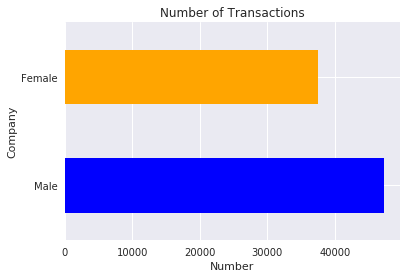

In [73]:
# Gender Distribution

# Frequency Distribution
print('Frequency Distribution: ' "\n",pink['Gender'].value_counts())

#Percentage Distribution
print('Percentage Distribution' "\n", pink['Gender'].value_counts(normalize=True))

# Graph
sns.set()
pink['Gender'].value_counts().plot.barh(color=['blue','orange'])
plt.xlabel('Number')
plt.ylabel('Company')
plt.title('Number of Transactions')
plt.show()

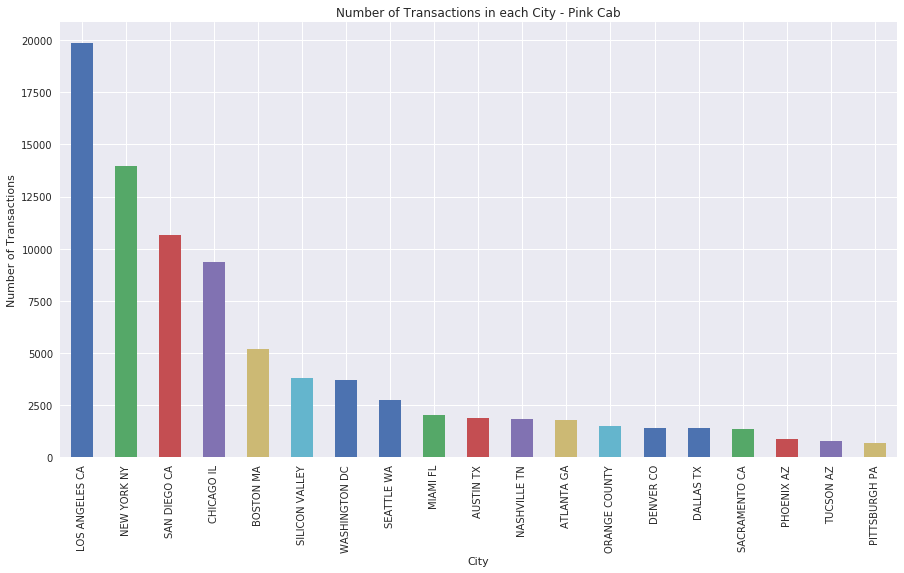

In [135]:
# City Distribution 


# Graph
sns.set(rc = {'figure.figsize':(15,8)})
pink['City'].value_counts().plot.bar()
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions in each City - Pink Cab')
plt.show()

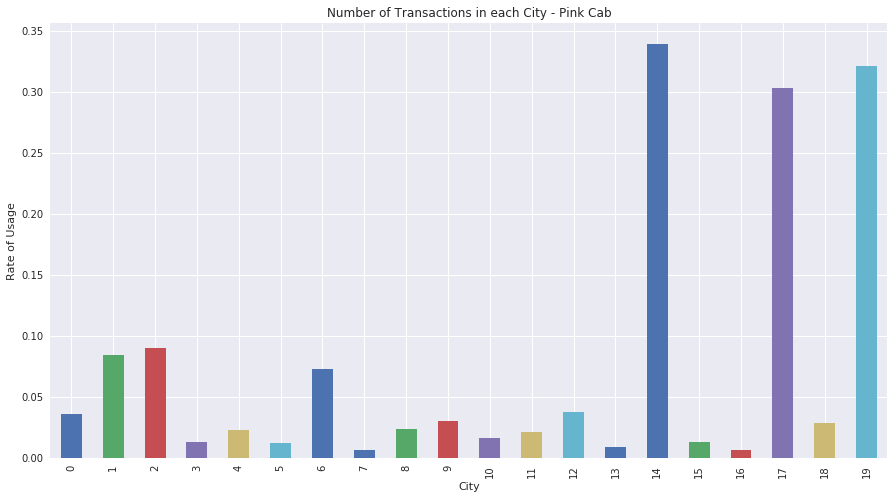

In [143]:
# Comparing population of different cities with the number of users.
city['Rate of Usage']=city['Users'].str.replace(',','').astype(int)/city['Population'].str.replace(',','').astype(int)
city.head()

sns.set(rc = {'figure.figsize':(15,8)})
city['Rate of Usage'].plot.bar()
plt.xlabel('City')
plt.ylabel('Rate of Usage')
plt.title('Number of Transactions in each City - Pink Cab')
plt.show()

In [134]:
# Customer Distribution

print("Maximum transactions by a customer: " , pink['Customer ID'].value_counts().max())
print("Minimum transactions by a customer: " , pink['Customer ID'].value_counts().min())

# New dataframe to capture number of transactions of different customers
counts=pd.DataFrame(pink['Customer ID'].value_counts())
counts.reset_index(inplace=True)
counts = counts.rename(columns = {'index':'Customer ID','Customer ID':'Transactions'})
counts.head()
print(counts['Transactions'].value_counts())
print(counts['Transactions'].value_counts(normalize=True))

counts['Transactions'].describe()



Maximum transactions by a customer:  18
Minimum transactions by a customer:  1
1     14334
2      6448
3      3586
4      2447
5      1825
6      1299
7       921
8       610
9       368
10      252
11      127
12       63
13       22
14       14
15        7
17        3
16        3
18        1
Name: Transactions, dtype: int64
1     0.443365
2     0.199443
3     0.110919
4     0.075688
5     0.056449
6     0.040179
7     0.028487
8     0.018868
9     0.011383
10    0.007795
11    0.003928
12    0.001949
13    0.000680
14    0.000433
15    0.000217
17    0.000093
16    0.000093
18    0.000031
Name: Transactions, dtype: float64


count    32330.000000
mean         2.620198
std          2.193812
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         18.000000
Name: Transactions, dtype: float64

There are only 240 unique customers with over 10 transactions, out of the 32330 unique customers. The data is positively skewed, lowering the mean number of transactions to 2.62, which is equivalent to 3. This may suggest that the company is doing a poor job at customer retention. 44.33% of the customers have only used the app once, which is almost half of the unique customers registered with the app. About 75% have less than 4 transactions. 

In [130]:
# Payment Modes

In [ ]:
# Age Distribution

In [ ]:
# Dates of Travel

In [ ]:
# Prices Charged

In [ ]:
# Cost of Trip

In [80]:
data['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [95]:
data['City']=data['City'].astype("category")
data['City'].dtype

CategoricalDtype(categories=['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL',
                  'DALLAS TX', 'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL',
                  'NASHVILLE TN', 'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ',
                  'PITTSBURGH PA', 'SACRAMENTO CA', 'SAN DIEGO CA',
                  'SEATTLE WA', 'SILICON VALLEY', 'TUCSON AZ',
                  'WASHINGTON DC'],
                 ordered=False)

In [99]:
data['City'].dtype.categories

Index(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'],
      dtype='object')

In [102]:
cityNames=data['City'].dtype.categories
pink['City'].value_counts()
yellow['City'].value_counts()
print(cityNames)

Index(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'],
      dtype='object')


ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

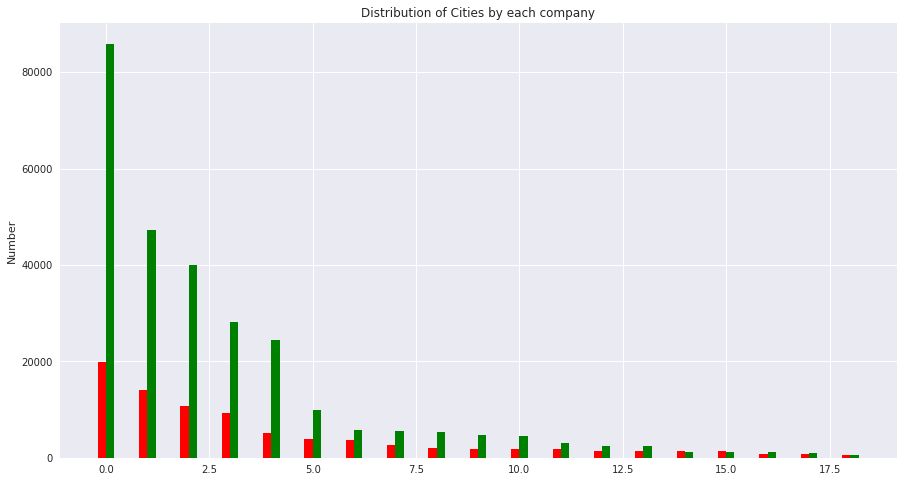

In [101]:
#City Distribution per Company
y1=pink['City'].value_counts()
y2=yellow['City'].value_counts()
labels=data['City'].dtype.categories
#['NEW YORK NY','CHICAGO IL','LOS ANGELES CA','WASHINGTON DC','BOSTON MA','SAN DIEGO CA','SILICON VALLEY','SEATTLE WA','ATLANTA GA','DALLAS TX','MIAMI FL','AUSTIN TX','ORANGE COUNTY','DENVER CO','NASHVILLE TN','SACRAMENTO CA','PHOENIX AZ','TUCSON AZ','PITTSBURGH PA']

x = np.arange(len(labels))  # the label locations
  # the width of the bars

fig, ax = plt.subplots()
company1 = ax.bar(x-0.1, y1, width, label='Pink',color='red')
company2= ax.bar(x+0.1 , y2, width, label='Yellow',color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number')
ax.set_title('Distribution of Cities by each company')
ax.set_xticks(labels)
ax.legend()

plt.show()